In [5]:
import pandas as pd
import numpy as np
import os
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium import Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster
import geojson
from shapely.geometry import Point

In [ ]:
# read shapefile
shapefile = gpd.read_file('../data/raw/flood/bgd_nhr_floods_sparsso.shp')

In [7]:
shapefile

,AREA,PERIMETER,F3_,F3_ID,GEOCODE,DISTCODE,DISTNAME,THANANAME,AREA_1,PERIMETE_1,FLOODCAT,FLOODCAT_L,NEWFIELD1,geometry
0,185047000.0,96008.720,2,4305,57790,577,Panchagarh,Tentulia,0.7037,26.5845,6,Low Flash Flooding,C,"POLYGON ((88.35722 26.45077, 88.35638 26.4544,..."
1,227183000.0,104804.900,3,4304,57773,577,Panchagarh,Panchagarh Sadar,0.7037,26.5845,6,Low Flash Flooding,C,"POLYGON ((88.51406 26.40561, 88.51638 26.40807..."
2,238207000.0,146521.300,4,4303,55270,552,Lalmonirhat,Patgram,4.5789,142.2744,0,Not Flood Prone,D,"POLYGON ((89.06611 26.27867, 89.0686 26.27958,..."
3,209056000.0,105281.000,5,4302,57704,577,Panchagarh,Atwari,0.7037,26.5845,6,Low Flash Flooding,C,"POLYGON ((88.32029 26.20124, 88.32399 26.20251..."
4,405427000.0,145135.300,6,4292,57725,577,Panchagarh,Boda,4.5789,142.2744,0,Not Flood Prone,D,"POLYGON ((88.48541 26.3497, 88.48885 26.34791,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4435,123971.0,1607.025,4437,0,0,0,None,None,0.0000,0.0000,0,None,None,"POLYGON ((92.24596 20.94443, 92.24765 20.9496,..."
4436,6634380.0,17606.010,4438,4,22290,222,Cox'S Bazar,Teknaf,4.5789,142.2744,0,Not Flood Prone,D,"POLYGON ((92.20762 20.92614, 92.205 20.93038, ..."
4437,4078240.0,12676.050,4439,3,22290,222,Cox'S Bazar,Teknaf,4.5789,142.2744,0,Not Flood Prone,D,"POLYGON ((92.25063 20.9161, 92.25096 20.92028,..."
4438,1455610.0,5814.698,4440,2,22290,222,Cox'S Bazar,Teknaf,4.5789,142.2744,0,Not Flood Prone,D,"POLYGON ((92.30609 20.78662, 92.30477 20.7828,..."


In [64]:
# show row floodcat = 1
shapefile[shapefile['FLOODCAT'] == 8].head(2)

,AREA,PERIMETER,F3_,F3_ID,GEOCODE,DISTCODE,DISTNAME,THANANAME,AREA_1,PERIMETE_1,FLOODCAT,FLOODCAT_L,NEWFIELD1,geometry
48,688271.3,3857.754,50,4258,57312,573,Nilphamari,Dimla,0.509,30.8491,8,Moderate Tidal Surge,B,"POLYGON ((88.95385 26.12411, 88.95337 26.12667..."
114,398266.9,3102.723,116,4204,57336,573,Nilphamari,Jaldhaka,0.509,30.8491,8,Moderate Tidal Surge,B,"POLYGON ((89.05792 25.98143, 89.0556 25.98238,..."


In [8]:
shapefile['DISTNAME'].unique()

array(['Panchagarh', 'Lalmonirhat', 'Nilphamari', None, 'Kurigram',
       'Rangpur', 'Thakurgaon', 'Dinajpur', 'Gaibandha', 'Jamalpur',
       'Sherpur', 'Naogaon', 'Joypurhat', 'Sunamganj', 'Sylhet',
       'Mymensingh', 'Netrakona', 'Bogra', 'Nawabganj', 'Maulvibazar',
       'Habiganj', 'Tangail', 'Sirajganj', 'Rajshahi', 'Natore',
       'Kishoreganj', 'Pabna', 'Gazipur', 'Brahamanbaria', 'Narsingdi',
       'Kushtia', 'Manikganj', 'Dhaka', 'Narayanganj', 'Meherpur',
       'Rajbari', 'Chuadanga', 'Comilla', 'Jhenaidah', 'Magura',
       'Faridpur', 'Bagerhat', 'Rangamati', 'Khagrachhari', 'Munshiganj',
       'Chandpur', 'Madaripur', 'Shariatpur', 'Jessore', 'Gopalganj',
       'Narail', 'Feni', 'Lakshmipur', 'Noakhali', 'Khulna', 'Barisal',
       'Chittagong', 'Satkhira', 'Pirojpur', 'Bhola', 'Jhalokati',
       'Patuakhali', 'Barguna', 'Bandarban', "Cox'S Bazar"], dtype=object)

In [9]:
len(shapefile['DISTNAME'].unique())

65

In [10]:
distname = ["Chittagong", 
            "Dhaka",
            "Narayanganj",
            "Feni",
            "Comilla",
            "Cox'S Bazar",
            "Brahamanbaria",
            "Habiganj",
            "Narsingdi",
            "Maulvibazar",
            "Sylhet",
            "Noakhali"
            ]
df = shapefile[shapefile['DISTNAME'].isin(distname)]

In [11]:
df

,AREA,PERIMETER,F3_,F3_ID,GEOCODE,DISTCODE,DISTNAME,THANANAME,AREA_1,PERIMETE_1,FLOODCAT,FLOODCAT_L,NEWFIELD1,geometry
502,50204300.0,45404.070,504,3748,69141,691,Sylhet,Gowainghat,0.2316,17.8269,4,Severe Flash Flooding,A,"POLYGON ((92.06554 25.19003, 92.06613 25.18624..."
503,129650.8,1722.497,505,3749,69153,691,Sylhet,Jaintiapur,0.2316,17.8269,4,Severe Flash Flooding,A,"POLYGON ((92.06554 25.19003, 92.07176 25.18941..."
504,4163300.0,9488.880,506,3747,69153,691,Sylhet,Jaintiapur,4.5789,142.2744,0,Not Flood Prone,D,"POLYGON ((92.07176 25.18941, 92.07406 25.18888..."
505,27527000.0,36997.020,507,3746,69153,691,Sylhet,Jaintiapur,0.2316,17.8269,4,Severe Flash Flooding,A,"POLYGON ((92.08223 25.18569, 92.08505 25.18644..."
506,17504800.0,21564.590,508,3744,69141,691,Sylhet,Gowainghat,0.2316,17.8269,4,Severe Flash Flooding,A,"POLYGON ((91.97237 25.16977, 91.97681 25.17149..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4434,64239100.0,100858.000,4436,6,22290,222,Cox'S Bazar,Teknaf,1.2174,62.5998,7,Severe Tidal Surge,A,"POLYGON ((92.20762 20.92614, 92.204 20.92761, ..."
4436,6634380.0,17606.010,4438,4,22290,222,Cox'S Bazar,Teknaf,4.5789,142.2744,0,Not Flood Prone,D,"POLYGON ((92.20762 20.92614, 92.205 20.93038, ..."
4437,4078240.0,12676.050,4439,3,22290,222,Cox'S Bazar,Teknaf,4.5789,142.2744,0,Not Flood Prone,D,"POLYGON ((92.25063 20.9161, 92.25096 20.92028,..."
4438,1455610.0,5814.698,4440,2,22290,222,Cox'S Bazar,Teknaf,4.5789,142.2744,0,Not Flood Prone,D,"POLYGON ((92.30609 20.78662, 92.30477 20.7828,..."


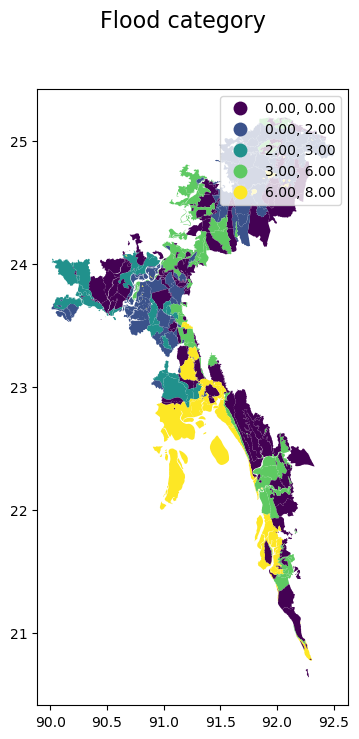

In [12]:
# Set up figure and axis
f, ax = plt.subplots(1, figsize=(8, 8))
# Plot % to leave
df.plot(column="FLOODCAT", scheme="Quantiles", legend=True, ax=ax)
# Title
f.suptitle("Flood category", size=16)
# add names to the plot
#for x, y, label in zip(df.geometry.centroid.x, df.geometry.centroid.y, df['DISTNAME']):
 #   ax.text(x, y, label, fontsize=5, ha='center', va='center')
# Draw
plt.show()

In [13]:
geo_json = df.to_crs(epsg=4326).__geo_interface__

In [14]:
quantile_bins = np.quantile(df['FLOODCAT'], [0, 0.2, 0.4, 0.6, 0.8, 1.0])
custom_bins = quantile_bins.tolist()

# base map centered at India's latitude and longitude
flood = folium.Map(location=[23.333317, 91.279502], tiles='cartodbpositron', zoom_start=7)

# choropleth map
Choropleth(
    geo_data=geo_json,  
    data=df,     
    columns=['GEOCODE', 'FLOODCAT'],  # the ID and value columns
    key_on="feature.properties.GEOCODE",  # match the key from the GeoJSON properties to the dataframe's ID column
    fill_color='YlGnBu', 
    legend_name='Literate Population Percentages', 
    threshold_scale=custom_bins
).add_to(flood)

# Display the map
flood

In [ ]:
road = pd.read_csv('../data/processed/df_road_N1andN2.csv')

In [ ]:
road2 = pd.read_csv('../data/processed/demo_100_with_traffic.csv')

In [19]:
road2

,Unnamed: 0,length,condition,lat,lon,intersection,model_type,id,road,name,chainage,traffic,heavy_truck,heavy_truck_normalized,truck_generation_frequency,sink_selection_probability
0,0,4.0,NaN,23.706028,90.443333,NaN,sourcesink,10000,N1,NaN,0.00400,21537.0,660.0,0.542317,3.0,0.153071
1,1,1800.0,NaN,23.702383,90.451097,0,link,10001,N1,NaN,1.80400,19357.0,402.0,0.330320,NaN,NaN
2,2,11.3,A,23.698739,90.458861,NaN,bridge,10002,N1,NaN,1.81530,19357.0,402.0,0.330320,NaN,NaN
3,3,3125.0,NaN,23.696701,90.473318,0,link,10003,N1,NaN,4.94030,16657.0,85.0,0.069844,NaN,NaN
4,4,6.6,A,23.694664,90.487775,NaN,bridge,10004,N1,NaN,4.94690,16657.0,85.0,0.069844,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2832,3007,6.0,A,24.622628,91.678091,NaN,bridge,13007,N207,NaN,68.40589,5329.0,31.0,0.025472,NaN,NaN
2833,3008,425.0,NaN,24.624480,91.677809,0,link,13008,N207,NaN,68.83089,5329.0,31.0,0.025472,NaN,NaN
2834,3009,4.0,NaN,24.626333,91.677527,N2,intersection,13009,N207,NaN,68.83489,5329.0,31.0,0.025472,NaN,NaN
2835,3010,425.0,NaN,24.626333,91.677527,0,link,13010,N207,NaN,69.25989,5329.0,31.0,0.025472,NaN,NaN


In [21]:
road

,Unnamed: 0,length,condition,lat,lon,intersection,model_type,id,road,name
0,0,4.0,NaN,23.706028,90.443333,NaN,sourcesink,10000,N1,NaN
1,1,1800.0,NaN,23.702383,90.451097,0,link,10001,N1,NaN
2,2,11.3,A,23.698739,90.458861,NaN,bridge,10002,N1,NaN
3,3,3125.0,NaN,23.696701,90.473318,0,link,10003,N1,NaN
4,4,6.6,A,23.694664,90.487775,NaN,bridge,10004,N1,NaN
...,...,...,...,...,...,...,...,...,...,...
3036,3036,4.0,NaN,24.916306,91.949583,N2,intersection,12147,N210,NaN
3037,3037,10844.0,NaN,24.882139,91.923152,0,link,13037,N210,NaN
3038,3038,4.0,NaN,24.848000,91.896750,N208,intersection,13038,N210,NaN
3039,3039,10844.0,NaN,24.848000,91.896750,0,link,13039,N210,NaN


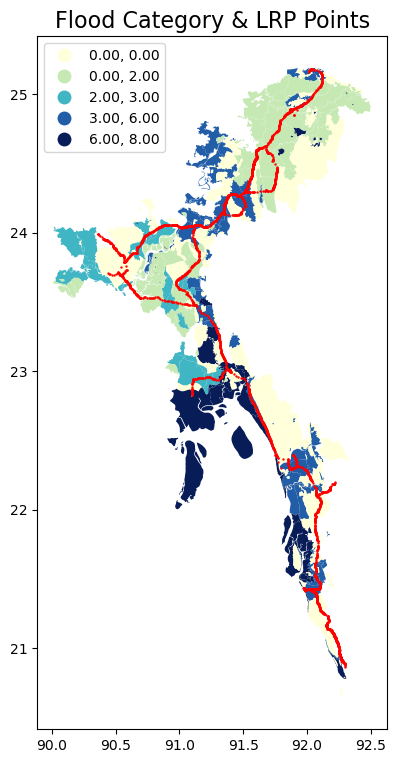

In [23]:
fig, ax = plt.subplots(figsize=(9, 9))

# Plot the flood choropleth
df.plot(column="FLOODCAT", scheme="Quantiles", legend=True, ax=ax, cmap="YlGnBu")

# Scatter the LRP points (Red dots)
ax.scatter(road["lon"], road["lat"], color="red", s=0.5, label="LRP Points")

# Title
plt.title("Flood Category & LRP Points", fontsize=16)

# Show plot
plt.show()

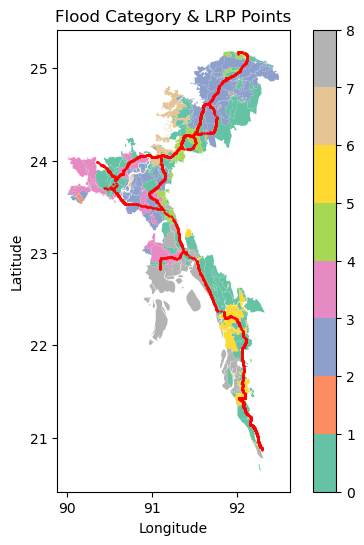

In [80]:
fig, ax = plt.subplots(figsize=(6, 6))

# Plot the flood choropleth
df.plot(column="FLOODCAT", legend=True, ax=ax, cmap="Set2")

# Scatter the LRP points (Red dots)
ax.scatter(road2["lon"], road2["lat"], color="red", s=0.5, label="LRP Points")

ax.set_xlabel("Longitude", fontsize=10)
ax.set_ylabel("Latitude", fontsize=10)

# Title
plt.title("Flood Category & LRP Points", fontsize=12)

# Show plot
plt.show()

In [26]:
lrp_gdf = gpd.GeoDataFrame(
    road2, 
    geometry=gpd.points_from_xy(road2.lon, road2.lat),
    crs="EPSG:4326"  # Ensure correct coordinate reference system
)

In [27]:
lrp_gdf

,Unnamed: 0,length,condition,lat,lon,intersection,model_type,id,road,name,chainage,traffic,heavy_truck,heavy_truck_normalized,truck_generation_frequency,sink_selection_probability,geometry
0,0,4.0,NaN,23.706028,90.443333,NaN,sourcesink,10000,N1,NaN,0.00400,21537.0,660.0,0.542317,3.0,0.153071,POINT (90.44333 23.70603)
1,1,1800.0,NaN,23.702383,90.451097,0,link,10001,N1,NaN,1.80400,19357.0,402.0,0.330320,NaN,NaN,POINT (90.4511 23.70238)
2,2,11.3,A,23.698739,90.458861,NaN,bridge,10002,N1,NaN,1.81530,19357.0,402.0,0.330320,NaN,NaN,POINT (90.45886 23.69874)
3,3,3125.0,NaN,23.696701,90.473318,0,link,10003,N1,NaN,4.94030,16657.0,85.0,0.069844,NaN,NaN,POINT (90.47332 23.6967)
4,4,6.6,A,23.694664,90.487775,NaN,bridge,10004,N1,NaN,4.94690,16657.0,85.0,0.069844,NaN,NaN,POINT (90.48777 23.69466)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2832,3007,6.0,A,24.622628,91.678091,NaN,bridge,13007,N207,NaN,68.40589,5329.0,31.0,0.025472,NaN,NaN,POINT (91.67809 24.62263)
2833,3008,425.0,NaN,24.624480,91.677809,0,link,13008,N207,NaN,68.83089,5329.0,31.0,0.025472,NaN,NaN,POINT (91.67781 24.62448)
2834,3009,4.0,NaN,24.626333,91.677527,N2,intersection,13009,N207,NaN,68.83489,5329.0,31.0,0.025472,NaN,NaN,POINT (91.67753 24.62633)
2835,3010,425.0,NaN,24.626333,91.677527,0,link,13010,N207,NaN,69.25989,5329.0,31.0,0.025472,NaN,NaN,POINT (91.67753 24.62633)


In [28]:
#lrp_gdf = lrp_gdf.drop(columns=['Unnamed: 0'])

In [29]:
flood_gdf = df.to_crs(df.crs)

In [30]:
lrp_with_risk = gpd.sjoin(lrp_gdf, flood_gdf[['geometry', 'FLOODCAT']], how="left", predicate="within")

In [31]:
lrp_with_risk

,Unnamed: 0,length,condition,lat,lon,intersection,model_type,id,road,name,chainage,traffic,heavy_truck,heavy_truck_normalized,truck_generation_frequency,sink_selection_probability,geometry,index_right,FLOODCAT
0,0,4.0,NaN,23.706028,90.443333,NaN,sourcesink,10000,N1,NaN,0.00400,21537.0,660.0,0.542317,3.0,0.153071,POINT (90.44333 23.70603),2223.0,0.0
1,1,1800.0,NaN,23.702383,90.451097,0,link,10001,N1,NaN,1.80400,19357.0,402.0,0.330320,NaN,NaN,POINT (90.4511 23.70238),2223.0,0.0
2,2,11.3,A,23.698739,90.458861,NaN,bridge,10002,N1,NaN,1.81530,19357.0,402.0,0.330320,NaN,NaN,POINT (90.45886 23.69874),2223.0,0.0
3,3,3125.0,NaN,23.696701,90.473318,0,link,10003,N1,NaN,4.94030,16657.0,85.0,0.069844,NaN,NaN,POINT (90.47332 23.6967),2223.0,0.0
4,4,6.6,A,23.694664,90.487775,NaN,bridge,10004,N1,NaN,4.94690,16657.0,85.0,0.069844,NaN,NaN,POINT (90.48777 23.69466),2451.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2832,3007,6.0,A,24.622628,91.678091,NaN,bridge,13007,N207,NaN,68.40589,5329.0,31.0,0.025472,NaN,NaN,POINT (91.67809 24.62263),1327.0,2.0
2833,3008,425.0,NaN,24.624480,91.677809,0,link,13008,N207,NaN,68.83089,5329.0,31.0,0.025472,NaN,NaN,POINT (91.67781 24.62448),1327.0,2.0
2834,3009,4.0,NaN,24.626333,91.677527,N2,intersection,13009,N207,NaN,68.83489,5329.0,31.0,0.025472,NaN,NaN,POINT (91.67753 24.62633),1327.0,2.0
2835,3010,425.0,NaN,24.626333,91.677527,0,link,13010,N207,NaN,69.25989,5329.0,31.0,0.025472,NaN,NaN,POINT (91.67753 24.62633),1327.0,2.0


In [32]:
# check na value
lrp_with_risk.isna().sum()

Unnamed: 0                       0
length                           0
condition                     1461
lat                              0
lon                              0
intersection                  1390
model_type                       0
id                               0
road                             0
name                          2837
chainage                         0
traffic                          0
heavy_truck                      0
heavy_truck_normalized           0
truck_generation_frequency    2823
sink_selection_probability    2823
geometry                         0
index_right                    415
FLOODCAT                       415
dtype: int64

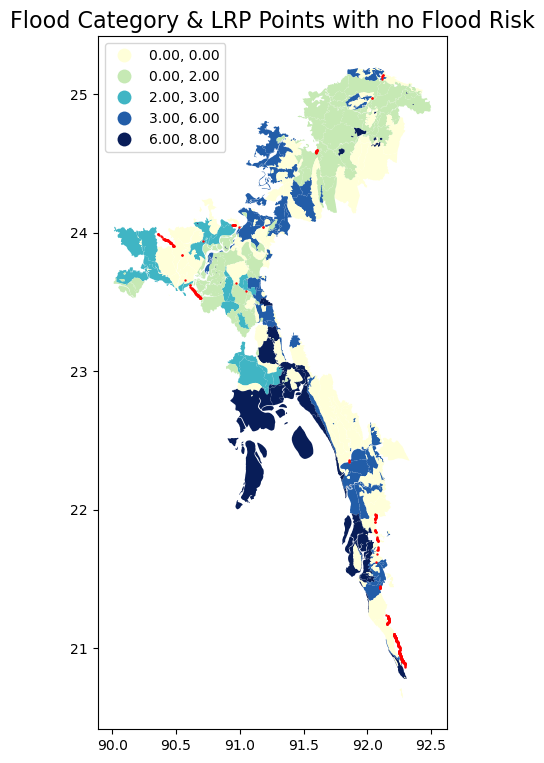

In [33]:
# plot lrp with na FLOODCAT value 
fig, ax = plt.subplots(figsize=(9, 9))
# Plot the flood choropleth
df.plot(column="FLOODCAT", scheme="Quantiles", legend=True, ax=ax, cmap="YlGnBu")
# Scatter the LRP points (Red dots)
ax.scatter(lrp_with_risk[lrp_with_risk['FLOODCAT'].isna()]["lon"], 
           lrp_with_risk[lrp_with_risk['FLOODCAT'].isna()]["lat"], 
           color="red", s=0.5, label="LRP Points with no Flood Risk")
# Title
plt.title("Flood Category & LRP Points with no Flood Risk", fontsize=16)
# Show plot
plt.show()

In [34]:
lrp_with_risk['FLOODCAT'] = lrp_with_risk['FLOODCAT'].fillna(method='ffill')

/var/folders/mf/ky9ttxzd0z318clhb4j11v_80000gn/T/ipykernel_5102/1773435760.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  lrp_with_risk['FLOODCAT'] = lrp_with_risk['FLOODCAT'].fillna(method='ffill')


In [35]:
lrp_with_risk.isna().sum()

Unnamed: 0                       0
length                           0
condition                     1461
lat                              0
lon                              0
intersection                  1390
model_type                       0
id                               0
road                             0
name                          2837
chainage                         0
traffic                          0
heavy_truck                      0
heavy_truck_normalized           0
truck_generation_frequency    2823
sink_selection_probability    2823
geometry                         0
index_right                    415
FLOODCAT                         0
dtype: int64

In [36]:
lrp_with_risk['FLOODCAT'].unique()

array([0., 3., 2., 4., 8., 7., 5., 6.])

/var/folders/mf/ky9ttxzd0z318clhb4j11v_80000gn/T/ipykernel_5102/1924745810.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=lrp_with_risk[lrp_with_risk['model_type'] == 'bridge'], x='FLOODCAT', palette='viridis')


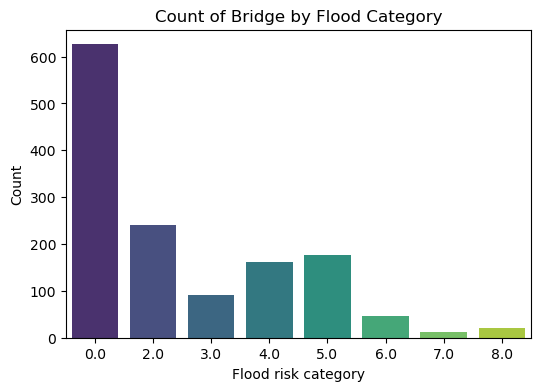

In [37]:
# count plot lrp_with_risk['FLOODCAT']
plt.figure(figsize=(6, 4))
sns.countplot(data=lrp_with_risk[lrp_with_risk['model_type'] == 'bridge'], x='FLOODCAT', palette='viridis')
plt.title('Count of Bridge by Flood Category')
plt.xlabel('Flood risk category')
plt.ylabel('Count')
plt.show()

In [38]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors

def plot_flood_risk(df_demo):
    # Create a scatter plot with traffic-based coloring
    plt.figure(figsize=(10, 8))

    # Normalize the traffic values for the colormap
    norm = mcolors.Normalize(vmin=df_demo['FLOODCAT'].min(), vmax=df_demo['FLOODCAT'].max())
    cmap = cm.inferno_r

    # Plot each road
    for road in df_demo['road'].unique():
        subset = df_demo[(df_demo['road'] == road) & (df_demo['model_type'] == 'link')]
        plt.scatter(
            subset['lon'], 
            subset['lat'], 
            c=subset['FLOODCAT'], 
            cmap=cmap, 
            norm=norm, 
            s=10, 
            marker='o', 
            label=road
        )

    ## Plot sourcesink and intersection points with different markers
    # Plot sourcesink points
    subset_sourcesink = df_demo[df_demo['model_type'] == 'sourcesink']
    plt.scatter(
        subset_sourcesink['lon'], 
        subset_sourcesink['lat'], 
        c='cyan', 
        s=50, 
        marker='s',  # Use 's' for square marker
        label='sourcesink'
    )
    # Plot intersection points
    subset_intersection = df_demo[df_demo['model_type'] == 'intersection']
    plt.scatter(
        subset_intersection['lon'], 
        subset_intersection['lat'], 
        c='blue', 
        s=30, 
        marker='o',
        label='intersection'
    )
    # Add legend for sourcesink and intersection
    handles, labels = plt.gca().get_legend_handles_labels()
    plt.legend(handles[-2:], labels[-2:], loc='upper left')


    # Annotate the first data point of each road with the road name
    for road in df_demo['road'].unique():
        first_point = df_demo[df_demo['road'] == road].iloc[0]
        plt.text(first_point['lon'], first_point['lat'], road, fontsize=9, ha='right')

    # Add a colorbar to show the traffic scale
    sm = cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array(df_demo['FLOODCAT'])  # Associate the traffic data with the ScalarMappable
    cbar = plt.colorbar(sm, ax=plt.gca(), label='FLOODCAT')

    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title('Road Network Plot with flood risk category')
    # Show only the legend for sourcesink
    plt.show()

In [65]:
def plot_truck(df_demo):
    # Create a scatter plot with traffic-based coloring
    plt.figure(figsize=(10, 8))

    # Normalize the traffic values for the colormap
    norm = mcolors.Normalize(vmin=df_demo['heavy_truck_normalized'].min(), vmax=df_demo['heavy_truck_normalized'].max())
    cmap = cm.inferno_r

    # Plot each road
    for road in df_demo['road'].unique():
        subset = df_demo[(df_demo['road'] == road) & (df_demo['model_type'] == 'link')]
        plt.scatter(
            subset['lon'], 
            subset['lat'], 
            c=subset['heavy_truck_normalized'], 
            cmap=cmap, 
            norm=norm, 
            s=10, 
            marker='o', 
            label=road
        )

    ## Plot sourcesink and intersection points with different markers
    # Plot sourcesink points
    subset_sourcesink = df_demo[df_demo['model_type'] == 'sourcesink']
    plt.scatter(
        subset_sourcesink['lon'], 
        subset_sourcesink['lat'], 
        c='cyan', 
        s=50, 
        marker='s',  # Use 's' for square marker
        label='sourcesink'
    )
    # Plot intersection points
    subset_intersection = df_demo[df_demo['model_type'] == 'intersection']
    plt.scatter(
        subset_intersection['lon'], 
        subset_intersection['lat'], 
        c='blue', 
        s=30, 
        marker='o',
        label='intersection'
    )
    # Add legend for sourcesink and intersection
    handles, labels = plt.gca().get_legend_handles_labels()
    plt.legend(handles[-2:], labels[-2:], loc='upper left')


    # Annotate the first data point of each road with the road name
    for road in df_demo['road'].unique():
        first_point = df_demo[df_demo['road'] == road].iloc[0]
        plt.text(first_point['lon'], first_point['lat'], road, fontsize=9, ha='right')

    # Add a colorbar to show the traffic scale
    sm = cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array(df_demo['heavy_truck_normalized'])  # Associate the traffic data with the ScalarMappable
    cbar = plt.colorbar(sm, ax=plt.gca(), label='heavy truck traffic (normalized)')

    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title('Road Network Plot with Heavy Truck Traffic')
    # Show only the legend for sourcesink
    plt.show()

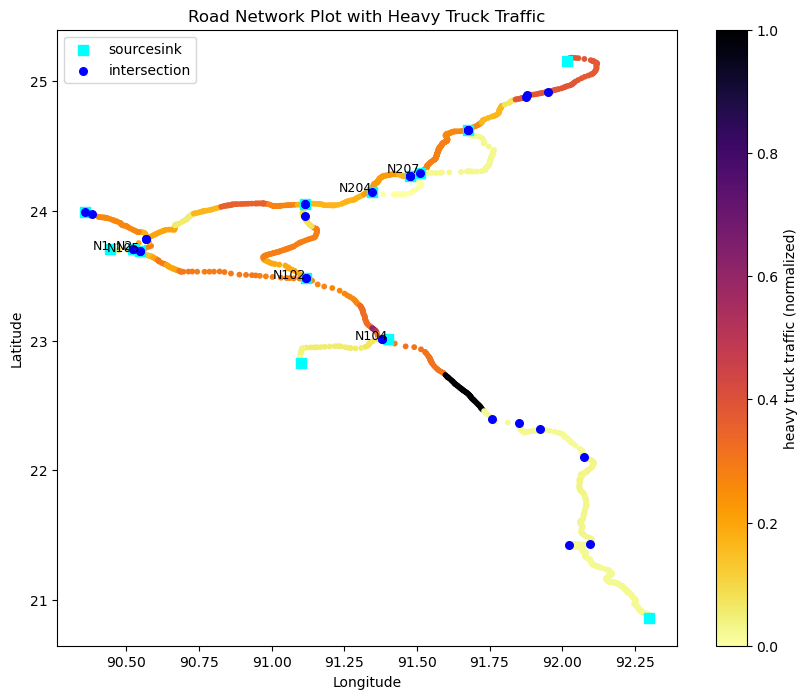

In [67]:
plot_truck(lrp_with_risk)

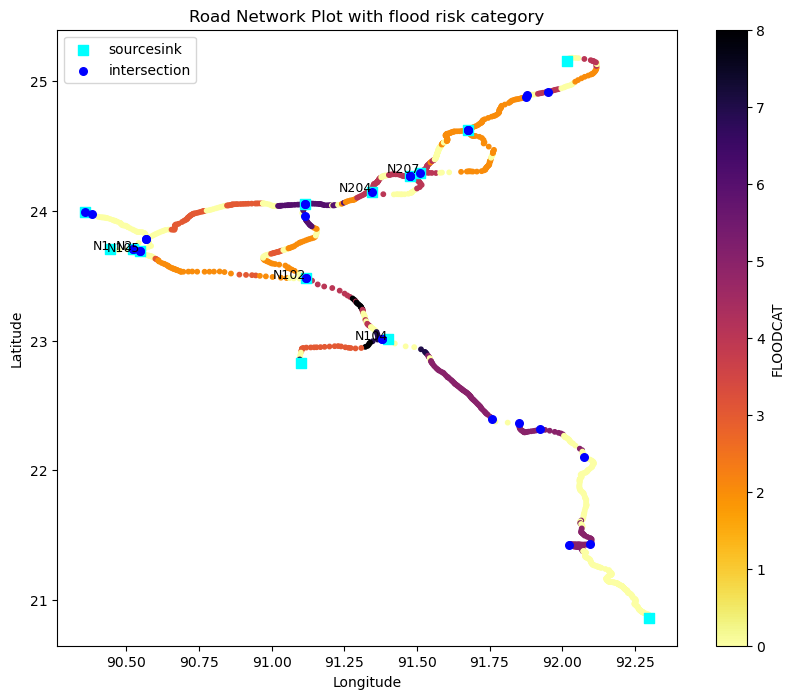

In [39]:
plot_flood_risk(lrp_with_risk)

In [46]:
lrp_with_risk.head(3)

,Unnamed: 0,length,condition,lat,lon,intersection,model_type,id,road,name,chainage,traffic,heavy_truck,heavy_truck_normalized,truck_generation_frequency,sink_selection_probability,geometry,index_right,FLOODCAT
0,0,4.0,NaN,23.706028,90.443333,NaN,sourcesink,10000,N1,NaN,0.0040,21537.0,660.0,0.542317,3.0,0.153071,POINT (90.44333 23.70603),2223.0,0.0
1,1,1800.0,NaN,23.702383,90.451097,0,link,10001,N1,NaN,1.8040,19357.0,402.0,0.330320,NaN,NaN,POINT (90.4511 23.70238),2223.0,0.0
2,2,11.3,A,23.698739,90.458861,NaN,bridge,10002,N1,NaN,1.8153,19357.0,402.0,0.330320,NaN,NaN,POINT (90.45886 23.69874),2223.0,0.0


In [47]:
# drop geometry and index_right
lrp_with_risk = lrp_with_risk.drop(columns=['geometry', 'index_right'])

In [48]:
lrp_with_risk.head(3)

,Unnamed: 0,length,condition,lat,lon,intersection,model_type,id,road,name,chainage,traffic,heavy_truck,heavy_truck_normalized,truck_generation_frequency,sink_selection_probability,FLOODCAT
0,0,4.0,NaN,23.706028,90.443333,NaN,sourcesink,10000,N1,NaN,0.0040,21537.0,660.0,0.542317,3.0,0.153071,0.0
1,1,1800.0,NaN,23.702383,90.451097,0,link,10001,N1,NaN,1.8040,19357.0,402.0,0.330320,NaN,NaN,0.0
2,2,11.3,A,23.698739,90.458861,NaN,bridge,10002,N1,NaN,1.8153,19357.0,402.0,0.330320,NaN,NaN,0.0


In [50]:
# save lrp_with_risk to csv
lrp_with_risk.to_csv('../../data/processed/demo_100_complete.csv', index=False)

In [51]:
road2.head(5)

,Unnamed: 0,length,condition,lat,lon,intersection,model_type,id,road,name,chainage,traffic,heavy_truck,heavy_truck_normalized,truck_generation_frequency,sink_selection_probability
0,0,4.0,NaN,23.706028,90.443333,NaN,sourcesink,10000,N1,NaN,0.0040,21537.0,660.0,0.542317,3.0,0.153071
1,1,1800.0,NaN,23.702383,90.451097,0,link,10001,N1,NaN,1.8040,19357.0,402.0,0.330320,NaN,NaN
2,2,11.3,A,23.698739,90.458861,NaN,bridge,10002,N1,NaN,1.8153,19357.0,402.0,0.330320,NaN,NaN
3,3,3125.0,NaN,23.696701,90.473318,0,link,10003,N1,NaN,4.9403,16657.0,85.0,0.069844,NaN,NaN
4,4,6.6,A,23.694664,90.487775,NaN,bridge,10004,N1,NaN,4.9469,16657.0,85.0,0.069844,NaN,NaN


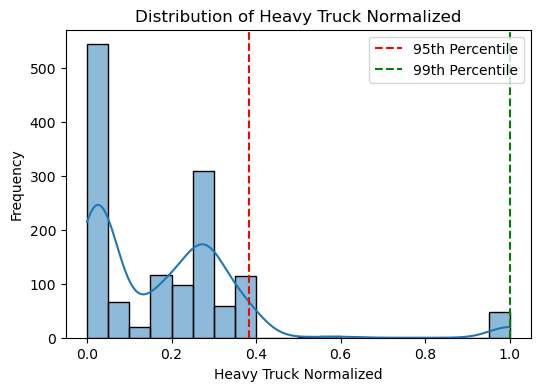

In [77]:
# histoplot heavy_truck_normalized, quantile
plt.figure(figsize=(6, 4))
sns.histplot(data=road2[road2['model_type']=='bridge'], x='heavy_truck_normalized', bins=20, kde=True)
plt.title('Distribution of Heavy Truck Normalized')
plt.xlabel('Heavy Truck Normalized')
plt.ylabel('Frequency')
plt.axvline(x=road2['heavy_truck_normalized'].quantile(0.95), color='r', linestyle='--', label='95th Percentile')
plt.axvline(x=road2['heavy_truck_normalized'].quantile(0.99), color='g', linestyle='--', label='99th Percentile')
plt.legend()
plt.show()

In [55]:
road2[road2['model_type']=='bridge'].describe()

,Unnamed: 0,length,lat,lon,id,name,chainage,traffic,heavy_truck,heavy_truck_normalized,truck_generation_frequency,sink_selection_probability
count,1376.000000,1376.000000,1376.000000,1376.000000,1376.000000,0.0,1376.000000,1376.000000,1376.000000,1376.000000,0.0,0.0
mean,1420.270349,18.332551,23.198263,91.560687,11420.270349,NaN,194.987833,8927.257267,226.579942,0.186179,NaN,NaN
std,835.719231,65.813633,1.287409,0.513250,835.719231,NaN,147.481617,3808.493204,244.199122,0.200657,NaN,NaN
min,2.000000,0.800000,20.880985,90.401807,10002.000000,NaN,0.044800,2628.000000,0.000000,0.000000,NaN,NaN
25%,705.500000,3.000000,21.994864,91.156836,10705.500000,NaN,51.863625,5820.000000,24.000000,0.019721,NaN,NaN
50%,1404.000000,6.000000,23.653972,91.598199,11404.000000,NaN,173.543910,7492.000000,205.000000,0.168447,NaN,NaN
75%,2101.500000,13.642500,24.263894,92.065291,12101.500000,NaN,313.040265,11793.000000,338.000000,0.277732,NaN,NaN
max,3007.000000,1408.800000,25.180537,92.298716,13007.000000,NaN,473.469360,24659.000000,1217.000000,1.000000,NaN,NaN
